In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression as  lr
from sklearn.model_selection import train_test_split as ts
from sklearn.preprocessing import MinMaxScaler 
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.feature_selection import RFE


In [140]:
Car_price=pd.read_csv('CarPrice_Assignment.csv',low_memory=False)

In [141]:
#details of Uber_rd data frame
print(Car_price.info())
print('\n')
print(Car_price.describe())
print('\n')
print(Car_price.shape)
print('\n')
print(Car_price.columns)
#column-wise null percentages here
print(round(100*(Car_price.isnull().sum()/len(Car_price.index)),2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

# Data Cleaning Starts 

In [142]:
# Bifarcation of the Carname to Company and model and Droping Carname column 

Car_price['Company_name']=Car_price['CarName'].str.partition(' ')[0]
Car_price.drop(['CarName'],axis=1)
# Changing Case 
Car_price['Company_name'] = pd.Series(map(lambda x : x.lower(),Car_price['Company_name'] ))

In [143]:
# make sure that number of duplicate rows are zero
Car_price.drop_duplicates( inplace=True)

In [144]:
#check for unique values for categorical variables
print(Car_price['Company_name'].unique())
print('\n')
print(Car_price['enginelocation'].unique())
print('\n')
print(Car_price['drivewheel'].unique())
print('\n')
print(Car_price['doornumber'].unique())
print('\n')
print(Car_price['fueltype'].unique())
print('\n')
print(Car_price['cylindernumber'].unique())
print('\n')
print(Car_price['enginetype'].unique())
print('\n')
print(Car_price['carbody'].unique())
print('\n')
print(Car_price['aspiration'].unique())
print('\n')
print(Car_price['fuelsystem'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


['front' 'rear']


['rwd' 'fwd' '4wd']


['two' 'four']


['gas' 'diesel']


['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']


['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


['std' 'turbo']


['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [145]:
#Correcting the names 
Car_price.loc[(Car_price['Company_name']== 'maxda'),['Company_name']]='mazda'

Car_price.loc[(Car_price['Company_name']== 'porcshce'),['Company_name']]='porsche'

Car_price.loc[(Car_price['Company_name']== 'vokswagen'),['Company_name']]='volkswagen'

Car_price.loc[(Car_price['Company_name']== 'vw'),['Company_name']]='volkswagen'

Car_price.loc[(Car_price['Company_name']== 'toyouta'),['Company_name']]='toyota'

Car_price.loc[(Car_price['cylindernumber']== 'four'),['cylindernumber']]=4

Car_price.loc[(Car_price['cylindernumber']== 'six'),['cylindernumber']]=6

Car_price.loc[(Car_price['cylindernumber']== 'five'),['cylindernumber']]=5

Car_price.loc[(Car_price['cylindernumber']== 'twelve'),['cylindernumber']]=12

Car_price.loc[(Car_price['cylindernumber']== 'two'),['cylindernumber']]=2

Car_price.loc[(Car_price['cylindernumber']== 'eight'),['cylindernumber']]=8

Car_price.loc[(Car_price['cylindernumber']== 'three'),['cylindernumber']]=3

Car_price.loc[(Car_price['doornumber']== 'four'),['doornumber']]=4

Car_price.loc[(Car_price['doornumber']== 'two'),['doornumber']]=2


## EDA Starts 

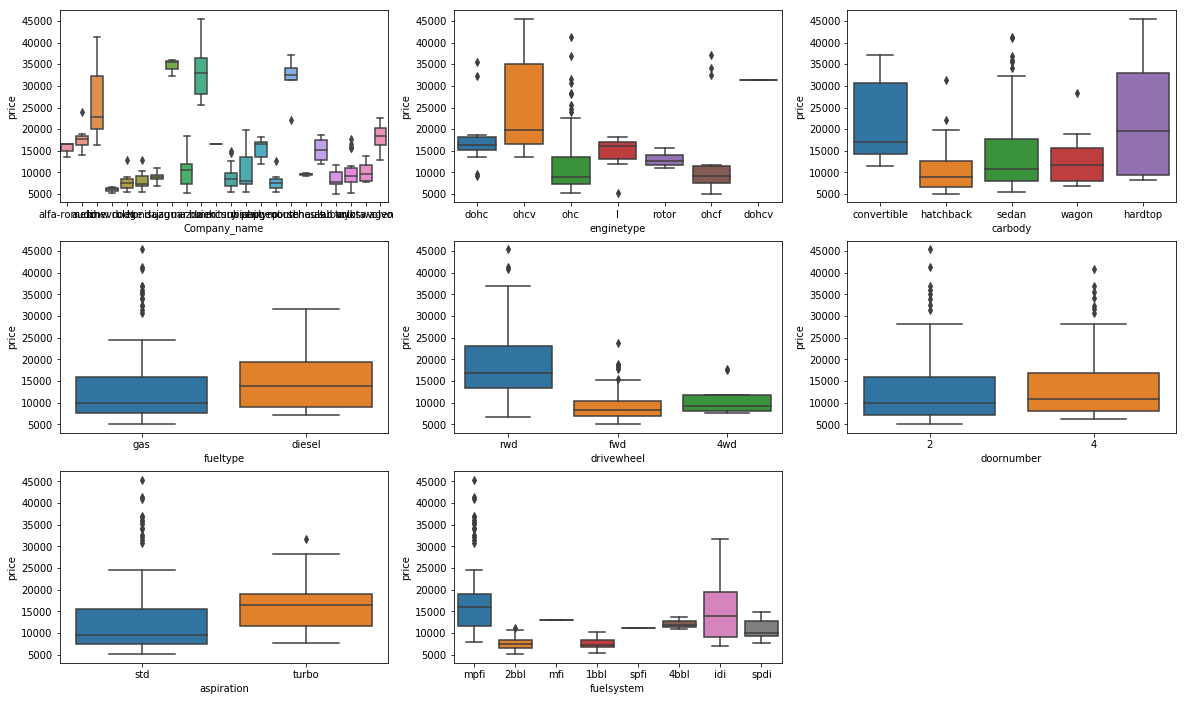

In [146]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'Company_name', y = 'price', data = Car_price)
plt.subplot(3,3,2)
sns.boxplot(x = 'enginetype', y = 'price', data = Car_price)
plt.subplot(3,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = Car_price)
plt.subplot(3,3,4)
sns.boxplot(x = 'fueltype', y = 'price', data = Car_price)
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = Car_price)
plt.subplot(3,3,6)
sns.boxplot(x = 'doornumber', y = 'price', data = Car_price)
plt.subplot(3,3,7)
sns.boxplot(x = 'aspiration', y = 'price', data = Car_price)
plt.subplot(3,3,8)
sns.boxplot(x = 'fuelsystem', y = 'price', data = Car_price)
plt.show()

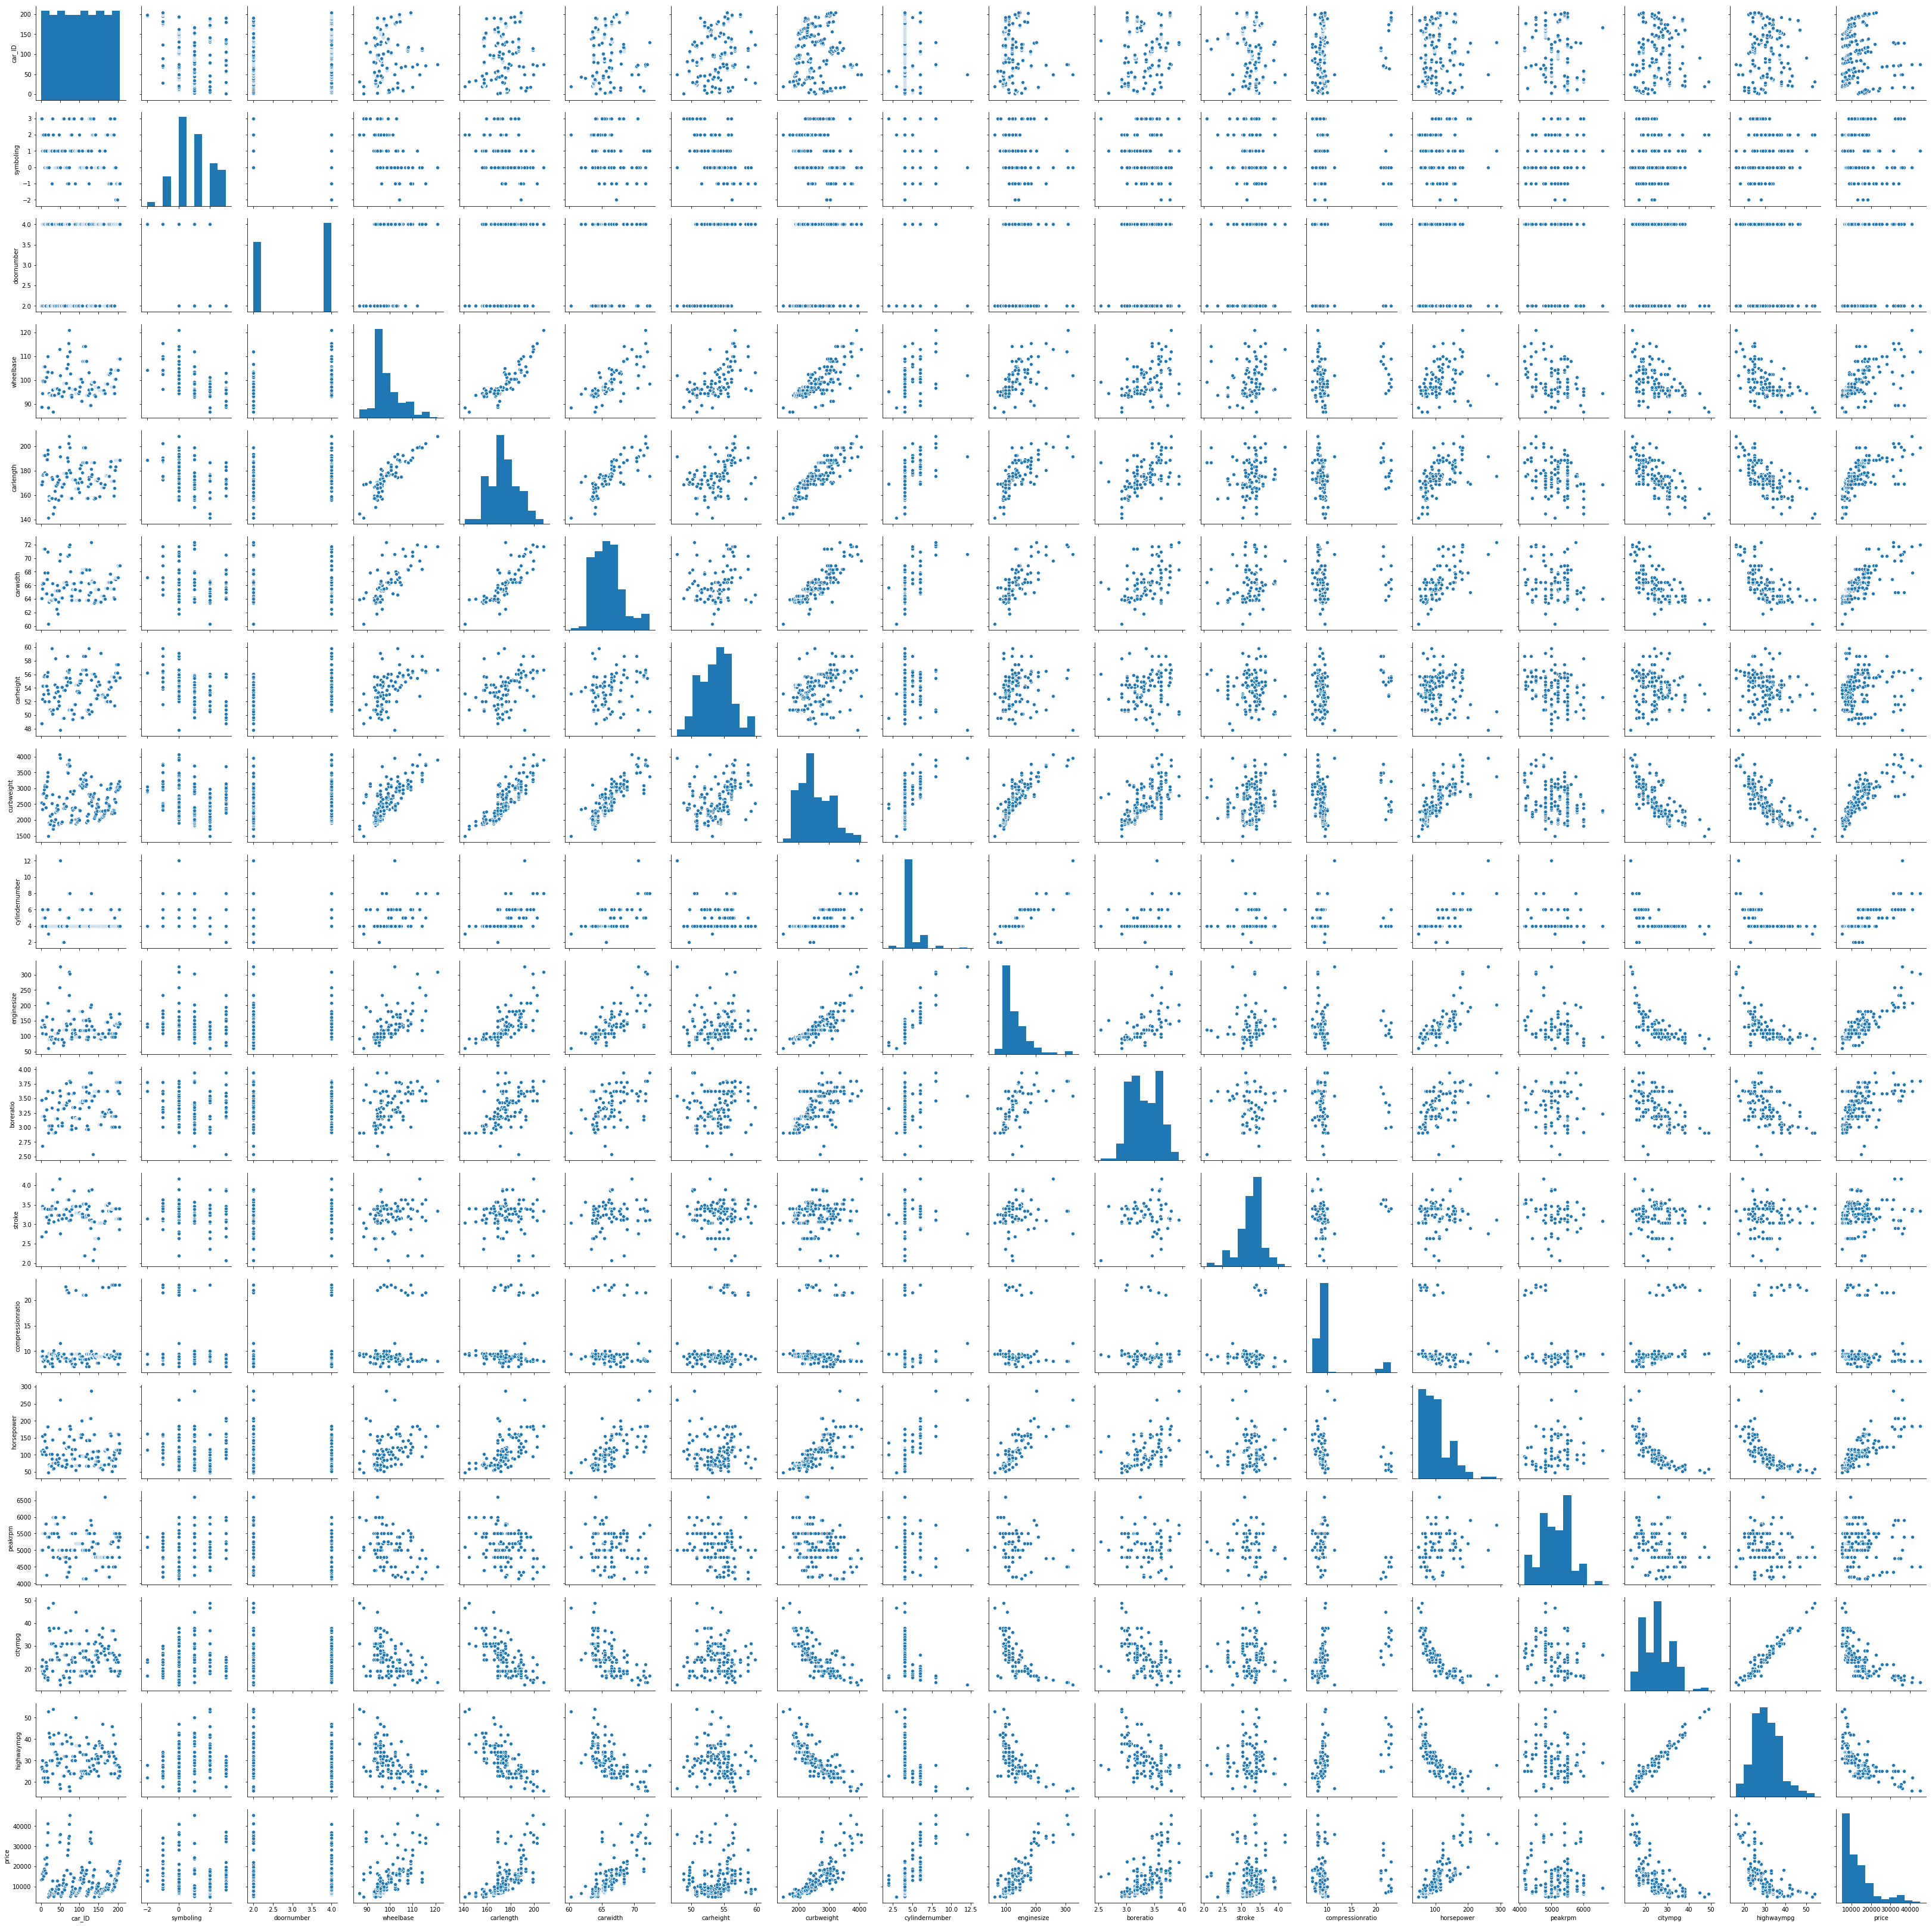

In [147]:
sns.pairplot(Car_price)

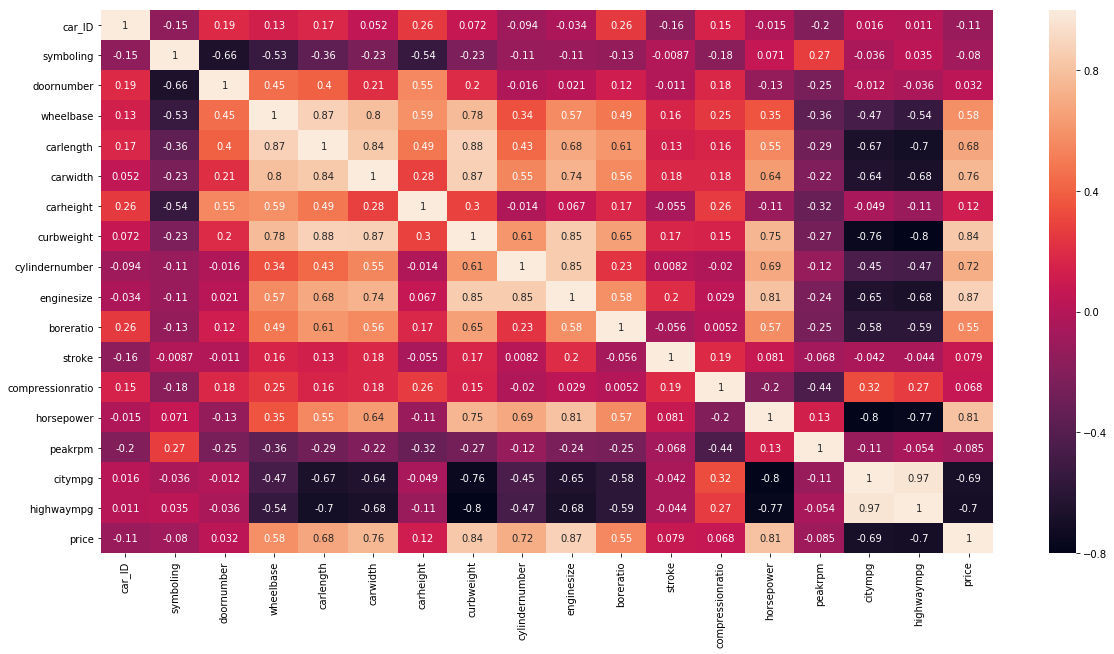

In [148]:
#Heat Map for Correlation 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(Car_price.corr(),annot = True)

## Adding Dummy variables 

In [149]:
enginelocation_status = pd.get_dummies(Car_price['enginelocation'], drop_first = True)
drivewheel_status = pd.get_dummies(Car_price['drivewheel'], drop_first = True)
fueltype_status=pd.get_dummies(Car_price['fueltype'], drop_first = True)
carbody_status=pd.get_dummies(Car_price['carbody'],drop_first=True)
aspiration_status=pd.get_dummies(Car_price['aspiration'],drop_first=True)
company_name_status=pd.get_dummies(Car_price['Company_name'],drop_first=True)
fuelsys_status=pd.get_dummies(Car_price['fuelsystem'],drop_first=True)
enginetype_status=pd.get_dummies(Car_price['enginetype'],drop_first=True)  


In [150]:
Car_price = pd.concat([Car_price, enginelocation_status,drivewheel_status,carbody_status,company_name_status,fueltype_status
                      ,aspiration_status,fuelsys_status,enginetype_status], axis = 1)
#Car_price=pd.concat([Car_price,company_name_status],axis=1)

In [151]:
Car_price.drop(['car_ID','CarName','enginelocation','drivewheel','carbody','Company_name','fueltype','aspiration','fuelsystem','enginetype'], axis = 1, inplace = True)
#Car_price.drop(['car_ID','CarName'], axis = 1, inplace = True)


## Splitting the train and test Data Set 

In [152]:
#Dividing the Data in Test and Train 
np.random.seed(0)
CP_train, CP_test = ts(Car_price, train_size = 0.7, test_size = 0.3, random_state = 100)

In [153]:
#Applying Min_Max scaling as we have dummy values 
mms= MinMaxScaler()
columns_scaled = ['wheelbase', 'carlength', 'cylindernumber','carwidth', 'carheight','enginesize','boreratio',
                  'stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price'
                 ,'doornumber','symboling','curbweight']      
CP_train[columns_scaled] = mms.fit_transform(CP_train[columns_scaled])

### Model Building starts 

In [154]:
y_train = CP_train.pop('price')
X_train = CP_train
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     54.97
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           8.61e-50
Time:                        23:41:42   Log-Likelihood:                 270.60
No. Observations:                 143   AIC:                            -431.2
Df Residuals:                      88   BIC:                            -268.2
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1799      0.105  

,Features,VIF
16,rear,inf
56,ohcf,inf
40,subaru,inf
44,gas,1101.960000
48,idi,333.940000
8,enginesize,234.030000
11,compressionratio,230.500000
7,cylindernumber,93.030000
50,mpfi,66.240000
12,horsepower,57.520000


In [155]:
#dropped rear as vif value is infinity 
X_train=X_train.drop('rear',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     54.97
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           8.61e-50
Time:                        23:41:42   Log-Likelihood:                 270.60
No. Observations:                 143   AIC:                            -431.2
Df Residuals:                      88   BIC:                            -268.2
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1799      0.105  

,Features,VIF
43,gas,1101.96
47,idi,333.94
8,enginesize,234.03
11,compressionratio,230.50
7,cylindernumber,93.03
39,subaru,78.00
49,mpfi,66.24
12,horsepower,57.52
14,citympg,55.40
6,curbweight,52.75


In [156]:
#dropped mercury as it has less eigen value and the data set has only 1 record 
X_train=X_train.drop('mercury',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     54.97
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           8.61e-50
Time:                        23:41:43   Log-Likelihood:                 270.60
No. Observations:                 143   AIC:                            -431.2
Df Residuals:                      88   BIC:                            -268.2
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1799      0.105  

,Features,VIF
42,gas,1101.96
46,idi,333.94
8,enginesize,234.03
11,compressionratio,230.50
7,cylindernumber,93.03
38,subaru,78.00
48,mpfi,66.24
12,horsepower,57.52
14,citympg,55.40
6,curbweight,52.75


In [157]:
#dropped symboling because of high p value  
X_train=X_train.drop('symboling',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     56.61
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.16e-50
Time:                        23:41:43   Log-Likelihood:                 270.57
No. Observations:                 143   AIC:                            -433.1
Df Residuals:                      89   BIC:                            -273.1
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1742      0.101  

,Features,VIF
41,gas,1000.48
45,idi,323.71
10,compressionratio,230.47
7,enginesize,225.36
6,cylindernumber,90.83
37,subaru,76.69
47,mpfi,65.76
11,horsepower,55.78
13,citympg,55.39
5,curbweight,52.68


In [158]:
#dropped ohcv because of high p value  
X_train=X_train.drop('ohcv',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     58.35
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.51e-51
Time:                        23:41:43   Log-Likelihood:                 270.56
No. Observations:                 143   AIC:                            -435.1
Df Residuals:                      90   BIC:                            -278.1
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1755      0.099  

,Features,VIF
41,gas,1000.12
45,idi,306.62
7,enginesize,224.96
10,compressionratio,219.03
6,cylindernumber,87.29
37,subaru,76.47
47,mpfi,64.97
13,citympg,53.92
11,horsepower,53.06
5,curbweight,52.24


In [159]:
#dropped mpfi  for high p value 
X_train=X_train.drop('mpfi',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     60.14
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.95e-52
Time:                        23:41:44   Log-Likelihood:                 270.55
No. Observations:                 143   AIC:                            -437.1
Df Residuals:                      91   BIC:                            -283.0
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1704      0.092  

,Features,VIF
41,gas,667.31
45,idi,301.27
10,compressionratio,218.69
7,enginesize,215.02
6,cylindernumber,87.21
37,subaru,76.00
13,citympg,53.37
5,curbweight,51.97
11,horsepower,49.43
14,highwaympg,47.27


In [160]:
#dropped rwd fro high p value  
X_train=X_train.drop('rwd',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     61.96
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.55e-53
Time:                        23:41:44   Log-Likelihood:                 270.49
No. Observations:                 143   AIC:                            -439.0
Df Residuals:                      92   BIC:                            -287.9
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1730      0.091  

,Features,VIF
40,gas,581.98
44,idi,300.79
7,enginesize,213.15
10,compressionratio,204.11
6,cylindernumber,84.78
36,subaru,76.00
13,citympg,52.27
5,curbweight,50.27
11,horsepower,48.19
14,highwaympg,46.94


In [161]:
#dropped mfi  as we have null value in VIF for that 
X_train=X_train.drop('mfi',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     61.96
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.55e-53
Time:                        23:41:44   Log-Likelihood:                 270.49
No. Observations:                 143   AIC:                            -439.0
Df Residuals:                      92   BIC:                            -287.9
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1730      0.091  

,Features,VIF
40,gas,581.98
44,idi,300.79
7,enginesize,213.15
10,compressionratio,204.11
6,cylindernumber,84.78
36,subaru,76.00
13,citympg,52.27
5,curbweight,50.27
11,horsepower,48.19
14,highwaympg,46.94


In [162]:
#dropped spfi as we have null value in vif  
X_train=X_train.drop('spfi',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     61.96
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.55e-53
Time:                        23:41:45   Log-Likelihood:                 270.49
No. Observations:                 143   AIC:                            -439.0
Df Residuals:                      92   BIC:                            -287.9
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1730      0.091  

,Features,VIF
40,gas,581.98
44,idi,300.79
7,enginesize,213.15
10,compressionratio,204.11
6,cylindernumber,84.78
36,subaru,76.00
13,citympg,52.27
5,curbweight,50.27
11,horsepower,48.19
14,highwaympg,46.94


In [163]:
#dropped volvo for high p value and vif  
X_train=X_train.drop('volvo',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     63.91
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           3.17e-54
Time:                        23:41:45   Log-Likelihood:                 270.48
No. Observations:                 143   AIC:                            -441.0
Df Residuals:                      93   BIC:                            -292.8
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1715      0.090  

,Features,VIF
39,gas,470.12
43,idi,300.61
10,compressionratio,192.10
7,enginesize,183.73
6,cylindernumber,56.79
36,subaru,47.95
13,citympg,47.82
11,horsepower,46.49
14,highwaympg,46.46
5,curbweight,46.38


In [164]:
#dropped spdi for high p value  
X_train=X_train.drop('spdi',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     65.92
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           3.93e-55
Time:                        23:41:45   Log-Likelihood:                 270.46
No. Observations:                 143   AIC:                            -442.9
Df Residuals:                      94   BIC:                            -297.7
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1699      0.089  

,Features,VIF
39,gas,469.10
43,idi,296.69
10,compressionratio,188.67
7,enginesize,183.06
6,cylindernumber,56.68
36,subaru,47.85
13,citympg,47.58
14,highwaympg,46.44
5,curbweight,46.20
11,horsepower,45.48


In [165]:
#dropped citympg has high vif value   and p value
X_train=X_train.drop('citympg',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     67.84
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           5.38e-56
Time:                        23:41:45   Log-Likelihood:                 270.26
No. Observations:                 143   AIC:                            -444.5
Df Residuals:                      95   BIC:                            -302.3
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1680      0.088  

,Features,VIF
38,gas,467.46
42,idi,295.06
10,compressionratio,185.34
7,enginesize,181.60
6,cylindernumber,56.66
35,subaru,47.79
5,curbweight,45.20
11,horsepower,43.57
46,ohcf,39.55
17,sedan,29.13


In [166]:
#dropped buick because of high p value/high vif  
X_train=X_train.drop('buick',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     69.80
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           7.49e-57
Time:                        23:41:45   Log-Likelihood:                 270.02
No. Observations:                 143   AIC:                            -446.0
Df Residuals:                      96   BIC:                            -306.8
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1810      0.085  

,Features,VIF
37,gas,464.48
41,idi,270.47
7,enginesize,175.53
10,compressionratio,167.98
6,cylindernumber,56.48
34,subaru,47.29
5,curbweight,45.06
45,ohcf,39.25
11,horsepower,36.61
17,sedan,29.12


In [167]:
#dropped 4bbl because of high p value/high vif  
X_train=X_train.drop('4bbl',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     71.18
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.59e-57
Time:                        23:41:46   Log-Likelihood:                 269.13
No. Observations:                 143   AIC:                            -446.3
Df Residuals:                      97   BIC:                            -310.0
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1814      0.085  

,Features,VIF
37,gas,462.80
40,idi,270.37
7,enginesize,174.61
10,compressionratio,167.17
6,cylindernumber,55.00
34,subaru,46.74
5,curbweight,45.04
44,ohcf,39.06
11,horsepower,33.73
17,sedan,29.00


In [168]:
#dropped gas because of high p value/high vif
X_train=X_train.drop('gas',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     71.18
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.59e-57
Time:                        23:41:46   Log-Likelihood:                 269.13
No. Observations:                 143   AIC:                            -446.3
Df Residuals:                      97   BIC:                            -310.0
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1146      0.084  

,Features,VIF
7,enginesize,504.94
10,compressionratio,276.05
39,idi,210.31
6,cylindernumber,195.96
2,carlength,179.75
5,curbweight,177.58
3,carwidth,138.86
8,boreratio,114.68
11,horsepower,97.77
1,wheelbase,90.97


In [169]:
#dropped enginesize because of high p value/high vif 
X_train=X_train.drop('enginesize',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     60.25
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.05e-54
Time:                        23:41:46   Log-Likelihood:                 255.33
No. Observations:                 143   AIC:                            -420.7
Df Residuals:                      98   BIC:                            -287.3
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0401      0.085  

,Features,VIF
9,compressionratio,228.12
2,carlength,171.77
38,idi,165.33
5,curbweight,161.43
3,carwidth,128.05
1,wheelbase,90.92
10,horsepower,83.97
8,stroke,65.99
6,cylindernumber,58.91
16,sedan,53.92


In [170]:
#dropped doornumber because of high p value/high vif 
X_train=X_train.drop('doornumber',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     62.28
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.58e-55
Time:                        23:41:46   Log-Likelihood:                 255.33
No. Observations:                 143   AIC:                            -422.7
Df Residuals:                      99   BIC:                            -292.3
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0400      0.084  

,Features,VIF
8,compressionratio,227.57
1,carlength,171.01
37,idi,164.75
4,curbweight,160.11
2,carwidth,127.42
0,wheelbase,90.92
9,horsepower,83.77
7,stroke,65.84
5,cylindernumber,57.30
15,sedan,51.78


In [171]:
#dropped fwd because of high p value/high vif 
X_train=X_train.drop('fwd',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     64.36
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           3.30e-56
Time:                        23:41:47   Log-Likelihood:                 255.28
No. Observations:                 143   AIC:                            -424.6
Df Residuals:                     100   BIC:                            -297.2
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0406      0.084  

,Features,VIF
8,compressionratio,225.28
1,carlength,169.65
36,idi,163.72
4,curbweight,136.36
2,carwidth,120.88
0,wheelbase,90.80
9,horsepower,83.77
7,stroke,65.57
5,cylindernumber,56.23
14,sedan,50.41


In [172]:
#dropped boreratio because of high p value/high vif 
X_train=X_train.drop('boreratio',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     66.41
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.54e-57
Time:                        23:41:47   Log-Likelihood:                 255.10
No. Observations:                 143   AIC:                            -426.2
Df Residuals:                     101   BIC:                            -301.8
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0541      0.079  

,Features,VIF
7,compressionratio,222.59
35,idi,161.63
1,carlength,161.31
4,curbweight,124.46
2,carwidth,120.82
0,wheelbase,90.63
8,horsepower,76.66
6,stroke,65.47
13,sedan,48.59
5,cylindernumber,48.07


In [173]:
#dropped cylindernumber because of high p value/high vif 
X_train=X_train.drop('cylindernumber',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     61.15
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.56e-55
Time:                        23:41:48   Log-Likelihood:                 247.05
No. Observations:                 143   AIC:                            -412.1
Df Residuals:                     102   BIC:                            -290.6
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0621      0.075  

,Features,VIF
6,compressionratio,180.73
1,carlength,150.69
34,idi,136.54
4,curbweight,119.39
2,carwidth,112.71
0,wheelbase,90.21
5,stroke,60.40
7,horsepower,60.35
12,sedan,48.09
3,carheight,43.52


In [174]:
#dropped curbweight because of high p value/high vif  
X_train=X_train.drop('curbweight',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     52.57
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.61e-52
Time:                        23:41:48   Log-Likelihood:                 234.31
No. Observations:                 143   AIC:                            -388.6
Df Residuals:                     103   BIC:                            -270.1
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2054      0.074  

,Features,VIF
5,compressionratio,180.68
33,idi,135.51
1,carlength,123.25
2,carwidth,103.26
0,wheelbase,88.08
4,stroke,59.16
11,sedan,46.64
6,horsepower,46.17
37,ohcf,39.43
8,highwaympg,37.98


In [175]:
#dropped wheelbase because of high p value/high vif   
X_train=X_train.drop('wheelbase',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     52.19
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.74e-52
Time:                        23:41:48   Log-Likelihood:                 231.39
No. Observations:                 143   AIC:                            -384.8
Df Residuals:                     104   BIC:                            -269.2
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1801      0.074  

,Features,VIF
4,compressionratio,179.58
32,idi,134.27
0,carlength,105.80
1,carwidth,77.43
3,stroke,59.05
36,ohcf,39.43
10,sedan,39.29
5,horsepower,36.99
27,subaru,36.65
7,highwaympg,33.38


In [176]:
#dropped carlength because of high p value/high vif    
X_train=X_train.drop('carlength',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     53.35
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.72e-53
Time:                        23:41:48   Log-Likelihood:                 230.42
No. Observations:                 143   AIC:                            -384.8
Df Residuals:                     105   BIC:                            -272.3
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1503      0.070  

,Features,VIF
3,compressionratio,174.26
31,idi,130.98
2,stroke,52.88
0,carwidth,46.80
35,ohcf,38.81
4,horsepower,36.72
26,subaru,36.25
9,sedan,35.49
1,carheight,32.85
6,highwaympg,30.85


In [177]:
#dropped carheight because of high p value/high vif
X_train=X_train.drop('carheight',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     54.95
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           9.05e-54
Time:                        23:41:48   Log-Likelihood:                 229.92
No. Observations:                 143   AIC:                            -385.8
Df Residuals:                     106   BIC:                            -276.2
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1299      0.066  

,Features,VIF
2,compressionratio,174.13
30,idi,130.94
1,stroke,48.13
0,carwidth,43.83
34,ohcf,36.64
3,horsepower,34.47
25,subaru,34.15
8,sedan,30.80
5,highwaympg,30.80
7,hatchback,22.78


In [178]:
#dropped ohc because of high p value/high vif 
X_train=X_train.drop('ohc',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     56.94
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.30e-54
Time:                        23:41:48   Log-Likelihood:                 229.79
No. Observations:                 143   AIC:                            -387.6
Df Residuals:                     107   BIC:                            -280.9
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1230      0.064  

,Features,VIF
2,compressionratio,173.85
30,idi,130.12
1,stroke,44.60
0,carwidth,41.85
33,ohcf,35.82
25,subaru,34.05
5,highwaympg,29.59
8,sedan,28.69
3,horsepower,26.71
7,hatchback,21.34


In [179]:
#dropped idi because of high p value/high vif  
X_train=X_train.drop('idi',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     52.40
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           7.50e-53
Time:                        23:41:49   Log-Likelihood:                 221.58
No. Observations:                 143   AIC:                            -373.2
Df Residuals:                     108   BIC:                            -269.5
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0345      0.062  

,Features,VIF
0,carwidth,40.13
1,stroke,38.70
32,ohcf,35.22
25,subaru,33.85
8,sedan,27.11
3,horsepower,24.30
5,highwaympg,23.30
7,hatchback,20.37
20,peugeot,14.61
31,l,14.45


In [180]:
#dropped ohcf because of high p value/high vif   
X_train=X_train.drop('ohcf',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     47.70
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           8.02e-51
Time:                        23:41:49   Log-Likelihood:                 212.65
No. Observations:                 143   AIC:                            -357.3
Df Residuals:                     109   BIC:                            -256.6
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0310      0.066  

,Features,VIF
1,stroke,38.67
0,carwidth,36.70
8,sedan,26.95
5,highwaympg,23.24
3,horsepower,21.69
7,hatchback,20.35
20,peugeot,14.56
31,l,14.44
4,peakrpm,13.96
9,wagon,7.82


In [181]:
#dropped l because of high p value/high vif   
X_train=X_train.drop('l',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     47.62
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           9.18e-51
Time:                        23:41:49   Log-Likelihood:                 209.87
No. Observations:                 143   AIC:                            -353.7
Df Residuals:                     110   BIC:                            -256.0
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0328      0.067  

,Features,VIF
1,stroke,38.65
0,carwidth,36.04
8,sedan,26.91
5,highwaympg,22.48
3,horsepower,21.39
7,hatchback,20.28
4,peakrpm,13.85
9,wagon,7.79
26,toyota,4.71
29,2bbl,4.68


In [182]:
#dropped peakrpm because of high p value/high vif    
X_train=X_train.drop('peakrpm',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     49.60
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.29e-51
Time:                        23:41:49   Log-Likelihood:                 209.87
No. Observations:                 143   AIC:                            -355.7
Df Residuals:                     111   BIC:                            -260.9
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0341      0.060  

,Features,VIF
1,stroke,37.66
0,carwidth,36.03
7,sedan,24.97
4,highwaympg,21.07
6,hatchback,19.06
3,horsepower,18.85
8,wagon,7.14
28,2bbl,4.68
25,toyota,4.67
2,compressionratio,4.14


In [183]:
#dropped highwaympg because of high p value/high vif    
X_train=X_train.drop('highwaympg',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     51.66
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.88e-52
Time:                        23:41:49   Log-Likelihood:                 209.79
No. Observations:                 143   AIC:                            -357.6
Df Residuals:                     112   BIC:                            -265.7
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0209      0.046  

,Features,VIF
1,stroke,37.27
0,carwidth,35.99
6,sedan,22.18
3,horsepower,17.41
5,hatchback,16.50
7,wagon,6.61
27,2bbl,4.46
24,toyota,4.34
17,nissan,3.66
15,mazda,3.65


In [184]:
#dropped stroke because of high p value/high vif     
X_train=X_train.drop('stroke',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     53.45
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           3.98e-53
Time:                        23:41:49   Log-Likelihood:                 209.21
No. Observations:                 143   AIC:                            -358.4
Df Residuals:                     113   BIC:                            -269.5
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0360      0.043  

,Features,VIF
0,carwidth,30.25
5,sedan,20.42
2,horsepower,17.37
4,hatchback,15.12
6,wagon,6.25
26,2bbl,4.43
23,toyota,3.82
14,mazda,3.26
1,compressionratio,3.18
16,nissan,3.08


In [185]:
#dropped sedan because of high p value/high vif     
X_train=X_train.drop('sedan',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     50.46
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.03e-51
Time:                        23:41:49   Log-Likelihood:                 202.48
No. Observations:                 143   AIC:                            -347.0
Df Residuals:                     114   BIC:                            -261.0
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0268      0.041  

,Features,VIF
0,carwidth,21.65
2,horsepower,17.37
25,2bbl,4.14
1,compressionratio,3.10
4,hatchback,2.52
13,mazda,2.49
24,turbo,2.41
22,toyota,2.35
18,porsche,2.29
15,nissan,2.04


In [186]:
#dropped hatchback because of high p value/high vif      
X_train=X_train.drop('hatchback',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     52.39
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.07e-52
Time:                        23:41:50   Log-Likelihood:                 201.98
No. Observations:                 143   AIC:                            -348.0
Df Residuals:                     115   BIC:                            -265.0
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0318      0.040  

,Features,VIF
0,carwidth,21.58
2,horsepower,17.20
24,2bbl,4.14
1,compressionratio,3.10
23,turbo,2.40
12,mazda,2.39
17,porsche,2.23
14,nissan,1.97
21,toyota,1.92
25,dohcv,1.75


In [187]:
#dropped wagon because of high p value/high vif       
X_train=X_train.drop('wagon',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     54.46
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.14e-53
Time:                        23:41:50   Log-Likelihood:                 201.47
No. Observations:                 143   AIC:                            -348.9
Df Residuals:                     116   BIC:                            -268.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0289      0.040  

,Features,VIF
0,carwidth,21.50
2,horsepower,17.20
23,2bbl,4.12
1,compressionratio,3.09
22,turbo,2.40
11,mazda,2.38
16,porsche,2.23
13,nissan,1.95
20,toyota,1.90
24,dohcv,1.74


In [188]:
#dropped carwidth because of high p value/high vif        
X_train=X_train.drop('carwidth',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     37.63
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.48e-44
Time:                        23:41:50   Log-Likelihood:                 174.38
No. Observations:                 143   AIC:                            -296.8
Df Residuals:                     117   BIC:                            -219.7
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1362      0.040  

,Features,VIF
1,horsepower,4.93
22,2bbl,3.54
21,turbo,2.38
10,mazda,2.34
15,porsche,2.17
0,compressionratio,1.98
12,nissan,1.93
19,toyota,1.89
23,dohcv,1.71
24,rotor,1.62


In [189]:
#dropped hardtop because of high p value/high vif         
X_train=X_train.drop('hardtop',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     39.40
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.78e-45
Time:                        23:41:50   Log-Likelihood:                 174.16
No. Observations:                 143   AIC:                            -298.3
Df Residuals:                     118   BIC:                            -224.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1353      0.039  

,Features,VIF
1,horsepower,4.92
21,2bbl,3.54
20,turbo,2.38
9,mazda,2.34
0,compressionratio,1.98
11,nissan,1.91
18,toyota,1.88
14,porsche,1.88
23,rotor,1.62
22,dohcv,1.60


In [190]:
#dropped turbo because of high p value/high vif          
X_train=X_train.drop('turbo',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     41.46
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.26e-46
Time:                        23:41:50   Log-Likelihood:                 174.16
No. Observations:                 143   AIC:                            -300.3
Df Residuals:                     119   BIC:                            -229.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1355      0.039  

,Features,VIF
1,horsepower,4.21
20,2bbl,3.40
9,mazda,2.33
11,nissan,1.90
18,toyota,1.83
14,porsche,1.81
0,compressionratio,1.68
22,rotor,1.61
21,dohcv,1.58
17,subaru,1.57


In [191]:
#dropped rotor because of high p value/high vif 
X_train=X_train.drop('rotor',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     43.53
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           7.90e-47
Time:                        23:41:50   Log-Likelihood:                 173.89
No. Observations:                 143   AIC:                            -301.8
Df Residuals:                     120   BIC:                            -233.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1370      0.039  

,Features,VIF
1,horsepower,4.21
20,2bbl,3.15
11,nissan,1.87
14,porsche,1.81
18,toyota,1.80
0,compressionratio,1.65
21,dohcv,1.58
9,mazda,1.57
17,subaru,1.55
8,jaguar,1.47


In [192]:
#dropped audi because of high p value/high vif  
X_train=X_train.drop('audi',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     45.20
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.84e-47
Time:                        23:41:50   Log-Likelihood:                 172.80
No. Observations:                 143   AIC:                            -301.6
Df Residuals:                     121   BIC:                            -236.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1155      0.036  

,Features,VIF
1,horsepower,3.52
19,2bbl,3.06
10,nissan,1.78
13,porsche,1.76
17,toyota,1.71
0,compressionratio,1.65
20,dohcv,1.57
8,mazda,1.53
16,subaru,1.50
7,jaguar,1.39


In [193]:
#dropped porsche because of high p value/high vif   
X_train=X_train.drop('porsche',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     47.67
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.94e-48
Time:                        23:41:50   Log-Likelihood:                 172.56
No. Observations:                 143   AIC:                            -303.1
Df Residuals:                     122   BIC:                            -240.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1149      0.036  

,Features,VIF
1,horsepower,3.02
18,2bbl,3.00
10,nissan,1.71
0,compressionratio,1.65
16,toyota,1.64
8,mazda,1.49
15,subaru,1.46
7,jaguar,1.33
9,mitsubishi,1.32
11,peugeot,1.28


In [194]:
#dropped 2bbl because of high p value/high vif    
X_train=X_train.drop('2bbl',1)
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_1.params
print(lr_1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     49.34
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.60e-48
Time:                        23:41:50   Log-Likelihood:                 170.98
No. Observations:                 143   AIC:                            -302.0
Df Residuals:                     123   BIC:                            -242.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1467      0.030  

,Features,VIF
1,horsepower,2.66
0,compressionratio,1.65
7,jaguar,1.29
11,peugeot,1.26
18,dohcv,1.23
16,toyota,1.21
2,bmw,1.19
10,nissan,1.17
8,mazda,1.15
9,mitsubishi,1.11


In [195]:
X_train.columns

Index(['compressionratio', 'horsepower', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen',
       'dohcv'],
      dtype='object')

## Model 1 evaluation  starts 

In [196]:
y_train_price = lr_1.predict(X_train_lm)

Text(0.5,0,'Errors')

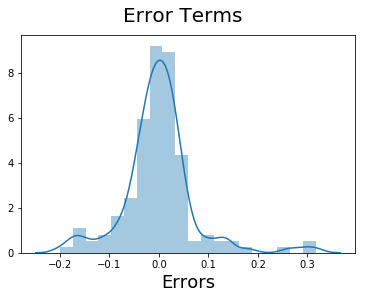

In [197]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

In [198]:
col = ['wheelbase', 'carlength', 'cylindernumber','carwidth', 'carheight','enginesize','boreratio',
                  'stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price'
                 ,'doornumber','symboling','curbweight']

CP_test[col] = mms.transform(CP_test[col])

In [199]:
CP_test.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,mfi,mpfi,spdi,spfi,dohcv,l,ohc,ohcf,ohcv,rotor
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0
mean,0.583871,0.564516,0.437764,0.559481,0.480376,0.559663,0.428470,0.232258,0.265673,0.556580,...,0.016129,0.500000,0.048387,0.016129,0.0,0.048387,0.806452,0.048387,0.064516,0.0
std,0.271724,0.499868,0.212861,0.189947,0.165440,0.215811,0.179488,0.088288,0.162820,0.228484,...,0.127000,0.504082,0.216335,0.127000,0.0,0.216335,0.398304,0.216335,0.247676,0.0
min,0.000000,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,0.200000,0.067925,-0.111111,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.400000,0.000000,0.313793,0.459350,0.358333,0.384956,0.305275,0.200000,0.177358,0.404762,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0
50%,0.600000,1.000000,0.387931,0.547967,0.441667,0.588496,0.406129,0.200000,0.226415,0.563492,...,0.000000,0.500000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0
75%,0.800000,1.000000,0.570690,0.719919,0.516667,0.699115,0.564876,0.200000,0.316038,0.746032,...,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.182759,1.089431,0.975000,1.061947,0.935609,0.600000,0.932075,0.888889,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0


In [200]:
y_test = CP_test.pop('price')
X_test = CP_test[['compressionratio', 'horsepower', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen',
       'dohcv']]
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)
# Creating X_test_m4 dataframe by dropping variables from X_test_m4
# Making predictions 
y_pred_m4 = lr_1.predict(X_test_m4)

Text(0,0.5,'y_pred')

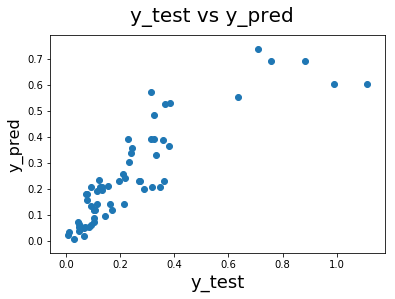

In [201]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     

In [202]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_m4)
r_squared = r2_score(y_test, y_pred_m4)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.013352130502933691
r_square_value : 0.7501857539167865


Text(0,0.5,'Views')

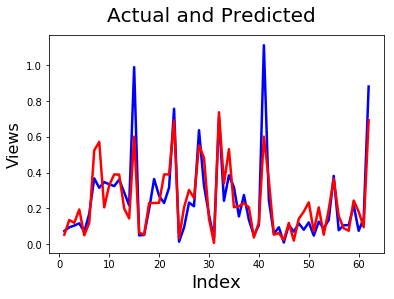

In [203]:
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred_m4, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

## Model 2 building starts 

In [204]:
#Dividing the Data in Test and Train 
np.random.seed(0)
CP_train, CP_test = ts(Car_price, train_size = 0.7, test_size = 0.3, random_state = 100)

#Applying Min_Max scaling as we have dummy values 
mms= MinMaxScaler()
columns_scaled = ['wheelbase', 'carlength', 'cylindernumber','carwidth', 'carheight','enginesize','boreratio',
                  'stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price'
                 ,'doornumber','symboling','curbweight']      
CP_train[columns_scaled] = mms.fit_transform(CP_train[columns_scaled])

### Model Building starts 
regress=lr()
y_train = CP_train.pop('price')
X_train = CP_train
regress.fit(X_train , y_train)
rfe=RFE(regress,20)
rfe=rfe.fit(X_train,y_train)

In [205]:
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True  True False  True  True  True  True  True  True
 False  True  True False  True False False False False False False False
  True False False False False False False False False False False  True
 False  True False  True False False False False  True False False False
  True False False False False False  True False False False  True]
[33 31  1  1  1 13  1  1  1  1  1  1  8  1  1 21  1 30 32  5  2  4  3 23
  1 29 17 14 18 25 19 27 38 11 24  1 15  1 20  1  6 26 22 36  1 10 28 12
  1 39 35 34 40  9  1 16  7 37  1]


In [206]:
# assigning x values for the autoselected variables 
col = X_train.columns[rfe.support_]
x_auto_select=X_train[col]

In [207]:

X_train_lm = sm.add_constant(x_auto_select)
lr_2 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_2.params
print(lr_2.summary())
vif = pd.DataFrame()
vif['Features'] = x_auto_select.columns
vif['VIF'] = [variance_inflation_factor(x_auto_select.values, i) for i in range(x_auto_select.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     104.4
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.06e-66
Time:                        23:42:03   Log-Likelihood:                 220.05
No. Observations:                 143   AIC:                            -400.1
Df Residuals:                     123   BIC:                            -340.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1491      0.075  

,Features,VIF
16,gas,266.80
17,idi,124.56
8,compressionratio,83.34
5,enginesize,40.24
3,curbweight,21.52
4,cylindernumber,21.07
1,carlength,12.70
13,peugeot,10.62
18,l,10.06
10,citympg,8.39


In [208]:
#dropping city mpg because of high p values 
x_auto_select=x_auto_select.drop('citympg',1)
X_train_lm = sm.add_constant(x_auto_select)
lr_2 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_2.params
print(lr_2.summary())
vif = pd.DataFrame()
vif['Features'] = x_auto_select.columns
vif['VIF'] = [variance_inflation_factor(x_auto_select.values, i) for i in range(x_auto_select.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     110.0
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           3.44e-67
Time:                        23:42:04   Log-Likelihood:                 219.37
No. Observations:                 143   AIC:                            -400.7
Df Residuals:                     124   BIC:                            -344.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1633      0.074  

,Features,VIF
15,gas,170.79
16,idi,124.24
8,compressionratio,64.34
5,enginesize,39.62
4,cylindernumber,20.31
3,curbweight,18.43
1,carlength,11.59
12,peugeot,10.25
17,l,9.34
2,carwidth,8.20


In [209]:
#dropping gas because of high p values 
x_auto_select=x_auto_select.drop('gas',1)
X_train_lm = sm.add_constant(x_auto_select)
lr_2 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_2.params
print(lr_2.summary())
vif = pd.DataFrame()
vif['Features'] = x_auto_select.columns
vif['VIF'] = [variance_inflation_factor(x_auto_select.values, i) for i in range(x_auto_select.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     110.0
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           3.44e-67
Time:                        23:42:04   Log-Likelihood:                 219.37
No. Observations:                 143   AIC:                            -400.7
Df Residuals:                     124   BIC:                            -344.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1046      0.064  

,Features,VIF
8,compressionratio,91.81
1,carlength,87.76
3,curbweight,78.73
15,idi,69.21
2,carwidth,59.63
5,enginesize,52.81
4,cylindernumber,48.46
0,wheelbase,37.51
6,boreratio,16.51
7,stroke,12.59


In [210]:
#dropping wheelbase becauseof correlation with compression ratio 
x_auto_select=x_auto_select.drop('wheelbase',1)
X_train_lm = sm.add_constant(x_auto_select)
lr_2 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_2.params
print(lr_2.summary())
vif = pd.DataFrame()
vif['Features'] = x_auto_select.columns
vif['VIF'] = [variance_inflation_factor(x_auto_select.values, i) for i in range(x_auto_select.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     115.2
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           9.29e-68
Time:                        23:42:04   Log-Likelihood:                 218.11
No. Observations:                 143   AIC:                            -400.2
Df Residuals:                     125   BIC:                            -346.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1021      0.065  

,Features,VIF
7,compressionratio,88.99
2,curbweight,77.59
0,carlength,71.70
14,idi,67.64
1,carwidth,53.03
4,enginesize,52.78
3,cylindernumber,46.47
5,boreratio,15.55
6,stroke,12.57
11,peugeot,10.72


In [211]:
#dropping carlength becauseof high p value
x_auto_select=x_auto_select.drop('carlength',1)
X_train_lm = sm.add_constant(x_auto_select)
lr_2 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_2.params
print(lr_2.summary())
vif = pd.DataFrame()
vif['Features'] = x_auto_select.columns
vif['VIF'] = [variance_inflation_factor(x_auto_select.values, i) for i in range(x_auto_select.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     121.0
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.55e-68
Time:                        23:42:04   Log-Likelihood:                 216.82
No. Observations:                 143   AIC:                            -399.6
Df Residuals:                     126   BIC:                            -349.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1124      0.064  

,Features,VIF
6,compressionratio,78.18
13,idi,58.66
1,curbweight,52.65
3,enginesize,50.81
2,cylindernumber,45.49
0,carwidth,39.69
4,boreratio,14.65
5,stroke,12.28
10,peugeot,10.48
7,peakrpm,9.56


In [212]:
#dropping curbweight becauseof high vif value and correlation
x_auto_select=x_auto_select.drop('curbweight',1)
X_train_lm = sm.add_constant(x_auto_select)
lr_2 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_2.params
print(lr_2.summary())
vif = pd.DataFrame()
vif['Features'] = x_auto_select.columns
vif['VIF'] = [variance_inflation_factor(x_auto_select.values, i) for i in range(x_auto_select.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     120.9
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.70e-67
Time:                        23:42:04   Log-Likelihood:                 211.89
No. Observations:                 143   AIC:                            -391.8
Df Residuals:                     127   BIC:                            -344.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1733      0.063  

,Features,VIF
5,compressionratio,74.91
12,idi,55.71
1,cylindernumber,45.49
2,enginesize,38.10
0,carwidth,29.07
3,boreratio,14.00
4,stroke,12.27
9,peugeot,10.42
13,l,9.49
6,peakrpm,9.47


In [213]:
#dropping idi becauseof high vif value
x_auto_select=x_auto_select.drop('idi',1)
X_train_lm = sm.add_constant(x_auto_select)
lr_2 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_2.params
print(lr_2.summary())
vif = pd.DataFrame()
vif['Features'] = x_auto_select.columns
vif['VIF'] = [variance_inflation_factor(x_auto_select.values, i) for i in range(x_auto_select.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     117.9
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           6.09e-66
Time:                        23:42:04   Log-Likelihood:                 205.10
No. Observations:                 143   AIC:                            -380.2
Df Residuals:                     128   BIC:                            -335.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1090      0.063  

,Features,VIF
0,carwidth,27.57
2,enginesize,27.28
1,cylindernumber,25.15
4,stroke,11.75
3,boreratio,10.49
9,peugeot,10.18
12,l,9.42
6,peakrpm,9.20
5,compressionratio,2.55
10,porsche,1.74


In [214]:
#dropping stroke becauseof high vif value
x_auto_select=x_auto_select.drop('stroke',1)
X_train_lm = sm.add_constant(x_auto_select)
lr_2 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_2.params
print(lr_2.summary())
vif = pd.DataFrame()
vif['Features'] = x_auto_select.columns
vif['VIF'] = [variance_inflation_factor(x_auto_select.values, i) for i in range(x_auto_select.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     100.3
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           8.71e-61
Time:                        23:42:04   Log-Likelihood:                 189.11
No. Observations:                 143   AIC:                            -350.2
Df Residuals:                     129   BIC:                            -308.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1951      0.037  

,Features,VIF
2,enginesize,26.12
0,carwidth,25.97
1,cylindernumber,24.39
3,boreratio,10.49
8,peugeot,9.99
11,l,9.35
5,peakrpm,6.15
4,compressionratio,2.12
6,rear,1.69
9,porsche,1.62


In [215]:
#dropping carwidth becauseof high vif value
x_auto_select=x_auto_select.drop('carwidth',1)
X_train_lm = sm.add_constant(x_auto_select)
lr_2 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_2.params
print(lr_2.summary())
vif = pd.DataFrame()
vif['Features'] = x_auto_select.columns
vif['VIF'] = [variance_inflation_factor(x_auto_select.values, i) for i in range(x_auto_select.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     68.30
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.33e-50
Time:                        23:42:04   Log-Likelihood:                 159.12
No. Observations:                 143   AIC:                            -292.2
Df Residuals:                     130   BIC:                            -253.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1403      0.045  

,Features,VIF
0,cylindernumber,23.96
1,enginesize,22.16
7,peugeot,9.44
10,l,9.16
2,boreratio,8.62
4,peakrpm,5.34
3,compressionratio,1.87
8,porsche,1.62
5,rear,1.53
11,rotor,1.42


In [216]:
#dropping peugeot becauseof high vif value
x_auto_select=x_auto_select.drop('peugeot',1)
X_train_lm = sm.add_constant(x_auto_select)
lr_2 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_2.params
print(lr_2.summary())
vif = pd.DataFrame()
vif['Features'] = x_auto_select.columns
vif['VIF'] = [variance_inflation_factor(x_auto_select.values, i) for i in range(x_auto_select.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     74.59
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           6.99e-51
Time:                        23:42:04   Log-Likelihood:                 158.72
No. Observations:                 143   AIC:                            -293.4
Df Residuals:                     131   BIC:                            -257.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1349      0.044  

,Features,VIF
0,cylindernumber,23.71
1,enginesize,21.94
2,boreratio,8.57
4,peakrpm,5.33
3,compressionratio,1.87
7,porsche,1.62
5,rear,1.53
10,rotor,1.42
9,l,1.27
6,bmw,1.15


In [217]:
#dropping cylindernumber becauseof high vif value and correlation
x_auto_select=x_auto_select.drop('cylindernumber',1)
X_train_lm = sm.add_constant(x_auto_select)
lr_2 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_2.params
print(lr_2.summary())
vif = pd.DataFrame()
vif['Features'] = x_auto_select.columns
vif['VIF'] = [variance_inflation_factor(x_auto_select.values, i) for i in range(x_auto_select.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     81.90
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.28e-51
Time:                        23:42:04   Log-Likelihood:                 158.14
No. Observations:                 143   AIC:                            -294.3
Df Residuals:                     132   BIC:                            -261.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1631      0.035  

,Features,VIF
1,boreratio,8.17
0,enginesize,5.75
3,peakrpm,2.93
2,compressionratio,1.78
6,porsche,1.62
4,rear,1.51
8,l,1.24
9,rotor,1.20
5,bmw,1.14
7,saab,1.07


In [218]:
#dropping boreratio becauseof high p value
x_auto_select=x_auto_select.drop('boreratio',1)
X_train_lm = sm.add_constant(x_auto_select)
lr_2 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()
lr_2.params
print(lr_2.summary())
vif = pd.DataFrame()
vif['Features'] = x_auto_select.columns
vif['VIF'] = [variance_inflation_factor(x_auto_select.values, i) for i in range(x_auto_select.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     91.56
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.39e-52
Time:                        23:42:05   Log-Likelihood:                 158.06
No. Observations:                 143   AIC:                            -296.1
Df Residuals:                     133   BIC:                            -266.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1546      0.027  

,Features,VIF
0,enginesize,2.93
2,peakrpm,2.31
1,compressionratio,1.68
5,porsche,1.57
3,rear,1.50
8,rotor,1.17
7,l,1.16
4,bmw,1.13
6,saab,1.03


In [219]:
x_auto_select.columns

Index(['enginesize', 'compressionratio', 'peakrpm', 'rear', 'bmw', 'porsche',
       'saab', 'l', 'rotor'],
      dtype='object')

## Model 2 evaluation  starts 

In [220]:
y_train_price_lr2 = lr_2.predict(X_train_lm)

Text(0.5,0,'Errors')

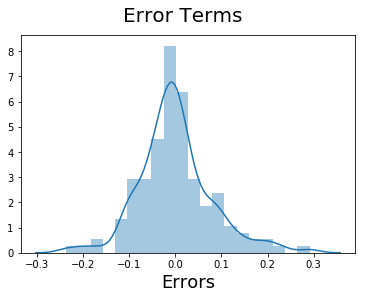

In [221]:
fig = plt.figure()
sns.distplot((y_train - y_train_price_lr2), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

In [222]:
col = ['wheelbase', 'carlength', 'cylindernumber','carwidth', 'carheight','enginesize','boreratio',
                  'stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price'
                 ,'doornumber','symboling','curbweight']

CP_test[col] = mms.transform(CP_test[col])

In [223]:
CP_test.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,mfi,mpfi,spdi,spfi,dohcv,l,ohc,ohcf,ohcv,rotor
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0
mean,0.583871,0.564516,0.437764,0.559481,0.480376,0.559663,0.428470,0.232258,0.265673,0.556580,...,0.016129,0.500000,0.048387,0.016129,0.0,0.048387,0.806452,0.048387,0.064516,0.0
std,0.271724,0.499868,0.212861,0.189947,0.165440,0.215811,0.179488,0.088288,0.162820,0.228484,...,0.127000,0.504082,0.216335,0.127000,0.0,0.216335,0.398304,0.216335,0.247676,0.0
min,0.000000,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,0.200000,0.067925,-0.111111,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.400000,0.000000,0.313793,0.459350,0.358333,0.384956,0.305275,0.200000,0.177358,0.404762,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0
50%,0.600000,1.000000,0.387931,0.547967,0.441667,0.588496,0.406129,0.200000,0.226415,0.563492,...,0.000000,0.500000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0
75%,0.800000,1.000000,0.570690,0.719919,0.516667,0.699115,0.564876,0.200000,0.316038,0.746032,...,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.182759,1.089431,0.975000,1.061947,0.935609,0.600000,0.932075,0.888889,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0


In [224]:
y_test = CP_test.pop('price')
X_test = CP_test[['enginesize', 'compressionratio', 'peakrpm', 'rear', 'bmw', 'porsche',
       'saab', 'l', 'rotor']]
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)
# Creating X_test_m4 dataframe by dropping variables from X_test_m4
# Making predictions 
y_pred_m4 = lr_2.predict(X_test_m4)

Text(0,0.5,'y_pred')

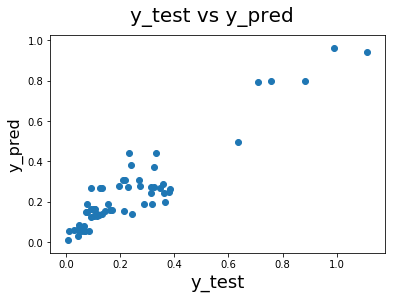

In [225]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     

In [226]:
mse = mean_squared_error(y_test, y_pred_m4)
r_squared = r2_score(y_test, y_pred_m4)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.006849884482177334
r_square_value : 0.8718407727293966


Text(0,0.5,'Views')

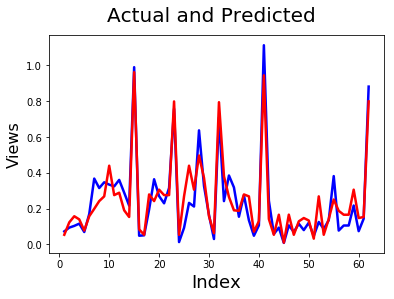

In [227]:
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred_m4, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

ON the basis of the evaluation between Model 1 and 2 we can conculde that  Model 2 is better and the r square values and the graph also depicts the same.Also if we look at business wise the model looks accurate since  the factors taken into consideration are compression ratio,engine size, peakrpm , rotor engine all which are important factors when price of the cars is determined as well the design  and most importantly the brands are also considered which fall under same category 

We can see that the equation of our best fitted line is:
​
$ price = enginesize  \times 1.1735  +compressionratio  \times 0.1120 + peakrpm  \times 0.1132  + rear   \times 0.1160  +bmw   \times 0.2288  +porsche  \times 0.1499 +  saab    \times  0.1008  + l      \times  0.0343  + rotor   \times 0.2196   $
​